In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [2]:
#Importing the data

dataset_movies=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 5 - HW/Datasets/movies.csv')

dataset_links=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 5 - HW/Datasets/links.csv')

dataset_ratings=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 5 - HW/Datasets/ratings.csv')

dataset_tags=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 5 - HW/Datasets/tags.csv')

# Data Exploration

In [3]:
#Taking a look in my data

print("Shape: %s" % str(dataset_movies.shape))
print("------------------------------------------------------------------")
print("Column names: %s" % str(dataset_movies.columns))
print("------------------------------------------------------------------")
str(dataset_movies.info())
print("------------------------------------------------------------------")
print(dataset_movies.describe())
print("------------------------------------------------------------------")
dataset_movies.head()

Shape: (9742, 3)
------------------------------------------------------------------
Column names: Index(['movieId', 'title', 'genres'], dtype='object')
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 152.3+ KB
------------------------------------------------------------------
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000
------------------------------------------------------------------


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
print("Shape: %s" % str(dataset_links.shape))
print("------------------------------------------------------------------")
print("Column names: %s" % str(dataset_links.columns))
print("------------------------------------------------------------------")
str(dataset_links.info())
print("------------------------------------------------------------------")
print(dataset_links.describe())
print("------------------------------------------------------------------")
dataset_links.head()

Shape: (9742, 3)
------------------------------------------------------------------
Column names: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
imdbId     9742 non-null int64
tmdbId     9734 non-null float64
dtypes: float64(1), int64(2)
memory usage: 228.4 KB
------------------------------------------------------------------
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    9665.500000
50%      7300.000000  1.672605e+05   16529.000000
75%     76232.000000  8.055685e+05   44205.750000
max    193609.000000  8.391976e+06  525662.000000
----------

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [41]:
print("Shape: %s" % str(dataset_ratings.shape))
print("------------------------------------------------------------------")
print("Column names: %s" % str(dataset_ratings.columns))
print("------------------------------------------------------------------")
str(dataset_ratings.info())
print("------------------------------------------------------------------")
print(dataset_ratings.describe())
print("------------------------------------------------------------------")
dataset_ratings.head()

Shape: (100836, 4)
------------------------------------------------------------------
Column names: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
------------------------------------------------------------------
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%   

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print("Shape: %s" % str(dataset_tags.shape))
print("------------------------------------------------------------------")
print("Column names: %s" % str(dataset_tags.columns))
print("------------------------------------------------------------------")
str(dataset_tags.info())
print("------------------------------------------------------------------")
print(dataset_tags.describe())
print("------------------------------------------------------------------")
dataset_tags.head()

Shape: (3683, 4)
------------------------------------------------------------------
Column names: Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
userId       3683 non-null int64
movieId      3683 non-null int64
tag          3683 non-null object
timestamp    3683 non-null int64
dtypes: int64(3), object(1)
memory usage: 100.7+ KB
------------------------------------------------------------------
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.0

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
counts_tags=dataset_tags['tag'].value_counts()
print(counts_tags[counts_tags > 20])
tags_top20=dataset_tags[dataset_tags['tag'].isin(counts_tags[counts_tags > 20].index)]
print("------------------------------------------------------------------")
print("Shape: %s" % str(tags_top20.shape))
print("------------------------------------------------------------------")
tags_top20.head()

In Netflix queue     131
atmospheric           36
superhero             24
thought-provoking     24
surreal               23
funny                 23
Disney                23
religion              22
sci-fi                21
quirky                21
dark comedy           21
psychology            21
Name: tag, dtype: int64
------------------------------------------------------------------
Shape: (390, 4)
------------------------------------------------------------------


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
31,49,109487,sci-fi,1493093332
48,62,410,dark comedy,1525636610
61,62,2124,quirky,1525636846
63,62,2953,funny,1525636885


## Creating a single dataset with movies and tags (Merging)

In [8]:
dataset_ratings_movies=pd.merge(dataset_ratings, dataset_movies, how='outer', on='movieId')
dataset_ratings_movies_tags=pd.merge(dataset_ratings_movies, dataset_tags, how='outer', on='movieId')

In [9]:
print("Shape: %s" % str(dataset_ratings_movies_tags.shape))
print("------------------------------------------------------------------")
dataset_ratings_movies_tags.head()

Shape: (285783, 9)
------------------------------------------------------------------


,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
0,1.0,1,4.0,964982703.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
1,1.0,1,4.0,964982703.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
2,1.0,1,4.0,964982703.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
3,5.0,1,4.0,847434962.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
4,5.0,1,4.0,847434962.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09


In [10]:
print("Shape: %s" % str(dataset_ratings_movies.shape))
print("------------------------------------------------------------------")
dataset_ratings_movies.head()

Shape: (100854, 6)
------------------------------------------------------------------


,userId,movieId,rating,timestamp,title,genres
0,1.0,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7.0,1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15.0,1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17.0,1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [11]:
counts_movies=dataset_ratings_movies_tags['title'].value_counts()
counts_movies[counts_movies > 800]

Pulp Fiction (1994)                                                               55567
Fight Club (1999)                                                                 11772
Star Wars: Episode IV - A New Hope (1977)                                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                     4655
2001: A Space Odyssey (1968)                                                       4469
Eternal Sunshine of the Spotless Mind (2004)                                       4454
Inception (2010)                                                                   3718
Big Lebowski, The (1998)                                                           3392
Donnie Darko (2001)                                                                3161
Forrest Gump (1994)                                                                2961
Braveheart (1995)                                                                  2370
Star Wars: Episode V - The Empir

## tags > 1000

In [12]:
counts_tags=dataset_ratings_movies_tags['tag'].value_counts()
print(counts_tags[counts_tags > 1000])
tags_top=dataset_ratings_movies_tags[dataset_ratings_movies_tags['tag'].isin(counts_tags[counts_tags > 1000].index)]
print("------------------------------------------------------------------")
print("Shape: %s" % str(tags_top.shape))
tags_top.head()

sci-fi               2527
thought-provoking    2487
twist ending         2434
atmospheric          2227
dark comedy          2056
superhero            1787
psychology           1750
Disney               1748
time travel          1730
suspense             1716
classic              1625
imdb top 250         1506
quirky               1414
space                1413
mindfuck             1401
disturbing           1378
psychological        1339
surreal              1336
action               1322
great soundtrack     1299
stylized             1222
crime                1190
aliens               1155
dreamlike            1144
violence             1092
funny                1092
cult film            1078
Mafia                1060
Quentin Tarantino    1053
music                1030
philosophy           1022
emotional            1019
Name: tag, dtype: int64
------------------------------------------------------------------
Shape: (47652, 9)


,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
852,1.0,47,5.0,964983815.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09
855,4.0,47,2.0,945173425.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09
858,6.0,47,4.0,845553317.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09
861,8.0,47,4.0,839463546.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09
864,13.0,47,5.0,987895819.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09


In [13]:
counts_title=tags_top['title'].value_counts()
print(counts_title[counts_title > 1000])
title_top=tags_top[tags_top['title'].isin(counts_title[counts_title > 1000].index)]
print("------------------------------------------------------------------")
print("Shape: %s" % str(title_top.shape))
title_top.head()

Pulp Fiction (1994)                             6754
Fight Club (1999)                               5014
Inception (2010)                                2145
Star Wars: Episode IV - A New Hope (1977)       2008
Donnie Darko (2001)                             1962
Eternal Sunshine of the Spotless Mind (2004)    1310
2001: A Space Odyssey (1968)                    1090
Name: title, dtype: int64
------------------------------------------------------------------
Shape: (20283, 9)


,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
6273,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,63.0,classic,1.443200e+09
6275,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76.0,action,1.439166e+09
6276,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76.0,sci-fi,1.439166e+09
6278,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,103.0,great soundtrack,1.431954e+09
6282,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0,classic,1.435943e+09


In [14]:
# Using the movie 'Star Wars: Episode IV - A New Hope' as example to check my dataset

In [15]:
title_top[title_top['movieId']==260]

,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
6273,1.0,260,5.0,9.649817e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,63.0,classic,1.443200e+09
6275,1.0,260,5.0,9.649817e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76.0,action,1.439166e+09
6276,1.0,260,5.0,9.649817e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76.0,sci-fi,1.439166e+09
6278,1.0,260,5.0,9.649817e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,103.0,great soundtrack,1.431954e+09
6282,1.0,260,5.0,9.649817e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0,classic,1.435943e+09
6288,1.0,260,5.0,9.649817e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,205.0,sci-fi,1.519899e+09
6291,1.0,260,5.0,9.649817e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,341.0,space,1.439751e+09
6293,1.0,260,5.0,9.649817e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,424.0,sci-fi,1.457901e+09
6299,4.0,260,5.0,9.450793e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,63.0,classic,1.443200e+09
6301,4.0,260,5.0,9.450793e+08,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76.0,action,1.439166e+09


## Ploting

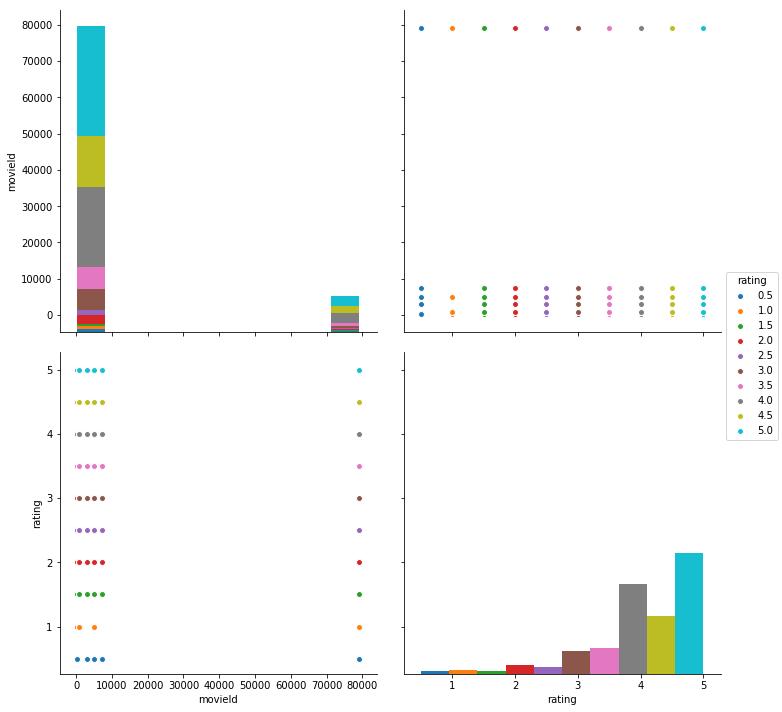

In [16]:
sns.pairplot(title_top, vars=["movieId", "rating"], hue="rating", size=5)

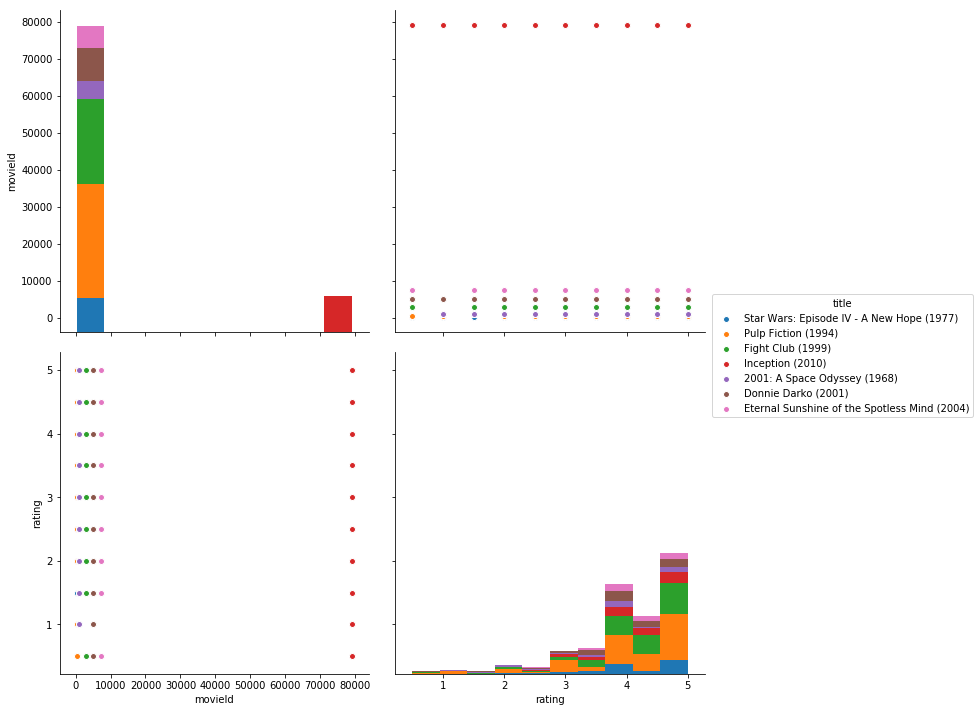

In [17]:
sns.pairplot(title_top, vars=["movieId", "rating"], hue="title", size=5)

In [18]:
# Count the number of ratings per movieId

title_top_count = title_top.groupby('title')['rating'].count()
title_top_count.head()

title
2001: A Space Odyssey (1968)                    1090
Donnie Darko (2001)                             1962
Eternal Sunshine of the Spotless Mind (2004)    1310
Fight Club (1999)                               5014
Inception (2010)                                2145
Name: rating, dtype: int64

In [19]:
# Count of the number of ratings per Product

title_top_count = title_top.groupby('movieId')['rating'].count()
title_top_count.head()

movieId
260     2008
296     6754
924     1090
2959    5014
4878    1962
Name: rating, dtype: int64

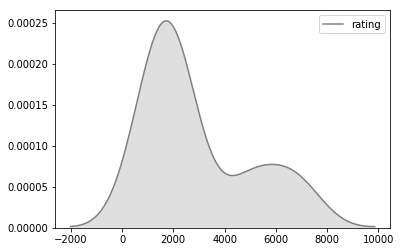

In [20]:
# Number of ratings per product KDE distribution

ax = sns.kdeplot(title_top_count, shade=True, color='grey')
plt.show()

# K-Means

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
# Count of the number of ratings per Product

title_top_count = title_top.groupby('movieId')['rating'].count()
title_top_count.head()

In [21]:
labelEncoder = LabelEncoder()
labelEncoder.fit(tags_top['tag'])

tags_top['tag'] = labelEncoder.transform(tags_top['tag'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
tags_top.head()

,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
852,1.0,47,5.0,964983815.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,30,1.457842e+09
855,4.0,47,2.0,945173425.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,30,1.457842e+09
858,6.0,47,4.0,845553317.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,30,1.457842e+09
861,8.0,47,4.0,839463546.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,30,1.457842e+09
864,13.0,47,5.0,987895819.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,30,1.457842e+09


In [26]:
tags_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47652 entries, 852 to 284845
Data columns (total 9 columns):
userId_x       47652 non-null float64
movieId        47652 non-null int64
rating         47652 non-null float64
timestamp_x    47652 non-null float64
title          47652 non-null object
genres         47652 non-null object
userId_y       47652 non-null float64
tag            47652 non-null int32
timestamp_y    47652 non-null float64
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 3.1+ MB


In [94]:
X = tags_top.drop(['genres', 'title', 'timestamp_x', 'timestamp_y','userId_x', 'userId_y'], axis=1)

In [95]:
X.head()

,movieId,rating,tag
852,47,5.0,30
855,47,2.0,30
858,47,4.0,30
861,47,4.0,30
864,47,5.0,30


In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47652 entries, 852 to 284845
Data columns (total 3 columns):
movieId    47652 non-null int64
rating     47652 non-null float64
tag        47652 non-null int32
dtypes: float64(1), int32(1), int64(1)
memory usage: 1.3 MB


In [97]:
# Building the K-Means model.

In [98]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [99]:
# Evaluating the K-means model

In [100]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [101]:
kmeans.cluster_centers_

array([[2.32423402e+03, 4.01649370e+00, 1.61113144e+01],
       [8.03351809e+04, 3.95678811e+00, 1.81079889e+01]])

In [102]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [103]:
y_kmeans = kmeans.predict(X)

In [104]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [105]:
X.head()

,movieId,rating,tag
852,47,5.0,30
855,47,2.0,30
858,47,4.0,30
861,47,4.0,30
864,47,5.0,30
